Class 16, Pair programming, Looking things up on the web, Andrea shows you her homework

pollev.com/andrealommen368

Andrea's homework'

Quizzes are back!!

Pair programming assignment: 
With your partner, come up with something you want to do with one
of the csv's on the web that would require a function you don't
know.  Look it up on the web and accomplish your self-assigned task.

A few suggestions:
* Make a legend on your plot
* Create a different kind of plot (bar graph perhaps?)
* Change the size of your tick marks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy.optimize import curve_fit

/packages/python3.6.8/lib/python3.6/site-packages/pandas-1.0.1-py3.6-linux-x86_64.egg/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# "How does the number of staffed hospital beds a state has affect the death rate of Covid-19?”


# First I read in my three data sets
Element 1(Reading in a public data set):

In [2]:

statepop = pd.read_csv("statepops.csv", delimiter=',')
statepop = statepop[['state','Unnamed: 12']] #Chose the two columns to use
statepop.rename({'Unnamed: 12': 'Population'}, axis=1, inplace=True) #renamed two columns
statepop.head(20)


,state,Population
0,Table 1. Annual Estimates of the Resident Popu...,NaN
1,Geographic Area,NaN
2,NaN,2019
3,United States,"328,239,523"
4,Northeast,"55,982,803"
5,Midwest,"68,329,004"
6,South,"125,580,448"
7,West,"78,347,268"
8,Alabama,4903185
9,Alaska,731545


In [3]:
stafbeds = pd.read_csv("staffedbeds.csv", delimiter=',')

stafbeds.head(5)

,State,Number of staffed beds
0,Alaska,1235
1,Alabama,15639
2,Arkansas,7818
3,Arizona,13434
4,California,73811


In [4]:
Hospit = pd.read_csv("Hospitalization_all_locs.csv", delimiter=',')
Hospit.head(5)

,Unnamed: 0,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,...,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper
0,1,Wyoming,1/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Wyoming,1/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Wyoming,1/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Wyoming,1/6/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Wyoming,1/7/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The Hospit data set and statepop had extra elements that did not match up with the third data set, stafbeds:

In [5]:
statepop=statepop.loc[statepop['state'].isin(stafbeds.State)] #separates all data that has the name of the states 
#in statepop that are also in stafbeds
statepop=copy.deepcopy(statepop) #copies the data frame with only the necessary rows indicated above, and creates a 
#new data set


In [6]:
#Same thing as above but with Hospit states instead of statepop
Hospit=Hospit.loc[Hospit['location_name'].isin(stafbeds.State)]
Hospit=copy.deepcopy(Hospit)


Hospit had all of its information by day for each state, so I had to make it the sum of the important data (all deaths from Covid-19 and all administered into the hospital for Covid-19). I also put the data into the same order as stafbeds to make it easier to add them to the same graph.

In [7]:
mdeaths=[] #new blank array
for eachstate in stafbeds.State: #for loop 
    mdeaths.append(sum(Hospit.loc[(Hospit['location_name']==eachstate)].deaths_mean)) #takes agrigate of deaths_mean
    #as Hospit state equals the 'eachstate' from the for loop 


In [8]:
#Does same as above but for 'admis_mean' (administered to the hospital)
adminis=[]
for eachstate in stafbeds.State:
    adminis.append(sum(Hospit.loc[(Hospit['location_name']==eachstate)].admis_mean))

In [9]:
deathper=[] #blank array
for i in range(0,len(stafbeds.State)): #for loop, 'i' will equal each index in stafbeds 
    deathper.append((mdeaths[i]/adminis[i])*100) #devides two arrays created above 


# statepop was also not in the same order, so I decided to test out a dictionary to get it in the same order

Element 2: Dictionaries or panda data structures

In [10]:
a =list(statepop.state)
b =list(statepop.Population) #creates two lists
state_lookup = {a[i]: b[i] for i in range(len(a))} #state name is the called upon key, Population is the value


In [11]:
alphapop=[]   # creates an empty
for location in stafbeds.State: #for loop to run through all locations in stafbed states
    alphapop.append(state_lookup[location]) #appends values from the dictionary as the keys equals each 'location'

In [55]:

stafbeds['Number of staffed beds'] = stafbeds['Number of staffed beds'].astype(int)
statepop['Population'] = statepop['Population'].astype(int) #changes columns into integer type
numbers_list = stafbeds['Number of staffed beds'].tolist()
empty_list = []
for x in range(len(alphapop)):
    adding = int(alphapop[x])/numbers_list[x]
    empty_list.append(adding)
    
    
stafbeds['People per Bed']= empty_list#adds new columns to stafbed


Element 3: simulating a data set

In [56]:
stafbeds['Death Percent']= deathper #adds deathper to stafbed
stafbeds.head(50)

,State,Number of staffed beds,Death Percent,People per Bed
0,Alaska,1235,17.623701,592.344130
1,Alabama,15639,27.074566,313.522923
2,Arkansas,7818,20.363115,386.007163
3,Arizona,13434,20.389640,541.813086
4,California,73811,18.553872,535.316186
5,Colorado,8246,19.818004,698.367208
6,Connecticut,8851,20.988604,402.811773
7,District of Columbia,2151,19.227864,328.102743
8,Delaware,2042,18.007546,476.867777
9,Florida,56247,22.533865,381.846801


In [57]:
stafbeds['People per Bed'].corr(stafbeds['Death Percent'], method='pearson') #correlation of values

-0.2998563416498537

Element 5: fitting a curve

In [58]:
def func(x, a, b):
    return a*x + b #linear approximation equation
popt, pcov = curve_fit(func, stafbeds['People per Bed'], stafbeds['Death Percent'])
popt

array([-8.30624482e-03,  2.41324824e+01])

In [59]:
stafbeds['People per Bed'] = stafbeds['People per Bed'].astype(int) #Wasn't working without being set as int
comp = popt[0]*stafbeds['People per Bed']+popt[1] #taking best fit for a and b from linear equation
comp[0:3]#test

0    19.215185
1    21.532628
2    20.926272
Name: People per Bed, dtype: float64

Element 4: Plotting one parameter vs another and using the plot for analysis of some kind

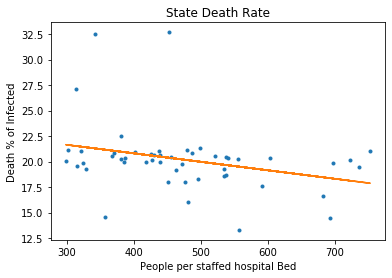

In [60]:
plt.plot(stafbeds['People per Bed'], stafbeds['Death Percent'], '.') #plot graph 
plt.xlabel("People per staffed hospital Bed")
plt.ylabel("Death % of Infected")
plt.title('State Death Rate')
plt.plot(stafbeds['People per Bed'], comp, '-') #best fit line


Element 6: Using only a subset of the data that meet some criterion

Text(0.5, 1.0, 'State Death Rate edited')

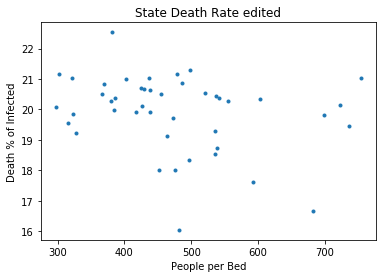

In [61]:
upper_death = np.percentile(stafbeds['Death Percent'], 94)#finds values in death percent that is in the 94th percentile
lower_death = np.percentile(stafbeds['Death Percent'], 6) #and 6th percentile
do = np.where((stafbeds['Death Percent'] < upper_death) & (stafbeds['Death Percent'] > lower_death))#stes perameters using 
#upper and lower deaths
plt.plot(stafbeds.loc[do]['People per Bed'], stafbeds.loc[do]['Death Percent'], '.') #plots new parameterized graph
plt.xlabel("People per Bed")
plt.ylabel("Death % of Infected")
plt.title('State Death Rate edited')



It was a little strange that it had a negative correlation, so I checked to make everything was lined up right in the data. I took the location of each needed data point, and set it to the state Pennsyvania from its original data set. I then calculated the values by hand. They were equal to the staf bed values, so it is a correct graph. 

Test suite:

In [62]:
stafbeds.loc[do]['People per Bed'].corr(stafbeds.loc[do]['Death Percent'], method='pearson')

-0.26276353125688334

Negative correlation of -0.263

In [63]:
sum(Hospit.loc[Hospit['location_name']=='Pennsylvania'].deaths_mean)


1707.3740000000003

In [64]:
sum(Hospit.loc[Hospit['location_name']=='Pennsylvania'].admis_mean)

11713.466532528999

In [65]:
1707.3740000000003/11713.466532528999

0.14576163215718593

In [66]:
statepop.loc[statepop['state']=='Pennsylvania'].Population

46    12801989
Name: Population, dtype: int64

In [67]:
stafbeds.loc[stafbeds['State']=='Pennsylvania']['Number of staffed beds']

38    35762
Name: Number of staffed beds, dtype: int64

In [68]:
12801989/35762


357.97743414797833

# Why I think the correlation is negative:

The correlation is negative, meaning that the more people per medically staffed bed the state, the lower the mortality rate. This is contradictory to what I thought it would look like.
My theory: The y value is not depended on the x value. They are both indpendent, but come from the same trend. In general places that are more prone to injury or sickness (possibly due to high density of people) will need more staffed hospital beds in general to deal with the high number of sickness/injury. The corona virus is no different, so states more "prone" to sickness are also the same states that are prepared with more staffed beds. 